# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [42]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [43]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [44]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

Q1: What test is appropriate for this problem? Does CLT apply?
    
A1: This problem requires a two-sample significance test. The CLT does apply because the sample sizes are sufficiently large (>30) and the observations are independent.

Q2: What are the null and alternate hypotheses?

A2:
    Null hypothesis: p_callback_w = p_callback_b
    Alternative hypothesis: p_callback_w =/= p_callback_b

In [45]:
w = data[data.race=='w']
b = data[data.race=='b']

Q3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [58]:
n_w = len(w)
n_b = len(b)

p_white = len(w[w.call == 1]) / float(n_w)
p_black = len(b[b.call == 1]) / float(n_b)

w_call_arr = w['call'].values
b_call_arr = b['call'].values
print(p_white, p_black)

(0.09650924024640657, 0.06447638603696099)


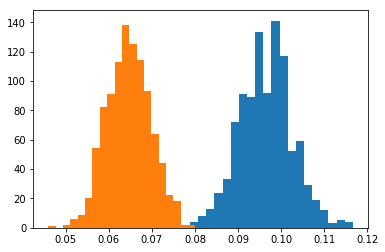

In [59]:
#BOOTSTRAP APPROACH (95% Confidence Interval)

sample_probs_w = []
for i in range(1000):
    sample = np.random.choice(w_call_arr, size=n_w, replace=True)
    sample_probs_w.append(np.sum(sample) / float(n_w))
    
sample_probs_b = []
for i in range(1000):
    sample = np.random.choice(b_call_arr, size=n_b, replace=True)
    sample_probs_b.append(np.sum(sample) / float(n_b))
    
_ = plt.hist(sample_probs_w, bins=20)
_ = plt.hist(sample_probs_b, bins=20)
plt.show()

In [52]:
top_b = np.percentile(sample_probs_b, 95)
min_w = np.min(sample_probs_w)
print(top_b, min_w)

#Minimum white prob. of callback is 0.08, which is higher than 95% percentile prob. of callback if black
#This means that chance of no statistical difference is outside of confidence interval
#NULL HYPOTHESIS REJECTED

(0.0731006160164271, 0.08008213552361396)


In [62]:
#FREQUENTIST APPROACH

p_hat = (np.sum(w_call_arr) + np.sum(b_call_arr)) / (float(n_w) + float(n_b))
#print(p_hat)

z = (p_white - p_black) / np.sqrt(p_hat * (1 - p_hat) * ((1 / float(n_w)) + (1 / float(n_b))))
print(z) #z-value of 4.1 >> 1.96 (critical value for 95% confidence), so NULL HYPOTHESIS REJECTED

0.08049281314168377
4.108412152434346


In [66]:
#FREQUENTIST APPROACH (Alternative)
margin_error_b = 1.96 * np.sqrt(p_black * (1 - p_black) / float(n_b)) #95% Confidence Interval => z* = 1.96
print(margin_error_b)

margin_error_w = 1.96 * np.sqrt(p_white * (1 - p_white) / float(n_w))
print(margin_error_w)

#Compare upper bound of black vs. lower bound of white
print(p_black + margin_error_b, p_white - margin_error_w)
#Lowest prob. of callback for white is higher than highest prob. of callback for black, w/ 95% confidence for both
#=> Significant difference exists - NULL HYPOTHESIS REJECTED

0.009755158027911414
0.011728781469131009
(0.0742315440648724, 0.08478045877727557)


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Q4: Write a story describing the statistical significance in the context of the original problem.

A4: In this project, I investigated racial discrimination in hiring practices using the provided sample data. In particular, I sought to discover whether or not there was a statistically significant difference in the proportion of callbacks from employers between applicants with "white-sounding names" and those with "black-sounding" names.

In the data, the percentage of callbacks for applicants with white-sounding names is 9.65%, while the percentage of callbacks for applicants with black-sounding names is only 6.45%. Rather than making a judgment on those two values alone, I calculated the margins of error for the two groups of applicants at a confidence interval of 95%. It turns out that the black-sounding proportion at the high end of its confidence interval (6.45% + 0.98% = 7.43%) is less than the white-sounding proportion at the low end of its confidence level (9.65% - 1.17% = 8.48%), confirming that there is, in fact, a statistically significant difference in the probability of callback between white-sounding and black-sounding applicants.

Q5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

A5: No, there are other factors that could play an even larger role in callback success. Significance tests for other variables could reveal an even greater statistical difference. To perform a fully comprehensive analysis, I would perform significance tests on all other relevant variables and compare the magnitudes of the difference to estimate relative levels of influence.